To add $\rho_t$ and energy as global variables and see if/how those help!

In [1]:
#imports
import uproot as ur
import awkward as ak
import numpy as np

import os
os.environ['CUDA_VISIBLE_DEVICES'] = "2" #specify GPU
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf

# energyflow imports
import energyflow as ef
from energyflow.archs import PFN
from energyflow.utils import data_split

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import graph_util as gu
import plot_util as pu

In [94]:
data_path = '/fast_scratch/atlas_images/v01-45/' 

In [4]:
file = np.load(data_path+'nn_splitdata_w7.npz')

In [5]:
X_train = file['arr_0']
X_val = file['arr_1']
X_test = file['arr_2']
Y_train = file['arr_3']
Y_val = file['arr_4']
Y_test = file['arr_5']
X_glob_tr = file['arr_6']
X_glob_val = file['arr_7']
X_glob_te = file['arr_8']
eta_train = file['arr_9']
eta_val = file['arr_10']
eta_test = file['arr_11']
ET_train = file['arr_12']
ET_val = file['arr_13']
ET_test = file['arr_14']

In [43]:
np.array(X_glob_tr[0]).shape

(380000,)

In [97]:
X_glob_train = np.stack((np.array(X_glob_tr[0]), np.array(X_glob_tr[1]), np.array(X_glob_tr[2])), axis=1)
X_glob_vali = np.stack((np.array(X_glob_val[0]), np.array(X_glob_val[1]), np.array(X_glob_val[2])), axis=1)
X_glob_test = np.stack((np.array(X_glob_te[0]), np.array(X_glob_te[1]), np.array(X_glob_te[2])), axis=1)

In [70]:
def GlobalModel(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_tr, X_glob_val, X_glob_te, epochs, batch_size,num_glob):
    #for now, try all three global features in X_glob okay?! 
    #one function to run the model & create the metrics
    
    Phi_sizes, F_sizes = (100, 100, 128), (100, 100, 100)
   
    #concatenate the Xs (needed for global features):
    X_tr = [X_train, X_glob_tr] #will this work?
    X_vali = [X_val, X_glob_val]
    X_te = [X_test, X_glob_te]
    
    #make the model:
    pfn = PFN(input_dim=X_train.shape[-1], Phi_sizes=Phi_sizes, F_sizes=F_sizes, num_global_features =num_glob)
    
    #try callbacks:
    callback = tf.keras.callbacks.ModelCheckpoint(data_path +'w7_pfn_global2.hdf5', save_best_only=True)
    
    # train model
    history = pfn.fit(X_tr, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_vali, Y_val), verbose=1, callbacks=[callback])
   
    return history

In [56]:
def selections(model, eta_test):#change this based on the selections you want
    #define the different eta regions
    selec_01 = abs(eta_test) < 0.1
    selec_02 = (abs(eta_test) >= .1) & (abs(eta_test) < .2)
    selec_03 = (abs(eta_test) >= .2) & (abs(eta_test) < .3)
    selec_04 = (abs(eta_test) >= .3) & (abs(eta_test) < .4)
    selec_05 = (abs(eta_test) >= .4) & (abs(eta_test) < .5)
    selec_06 = (abs(eta_test) >= .5) & (abs(eta_test) < .6)
    selec_07 = (abs(eta_test) >= .6) & (abs(eta_test) < .7)
    selec_08 = (abs(eta_test) >= .7) & (abs(eta_test) < .8)
    selec_09 = (abs(eta_test) >= .8) & (abs(eta_test) < .9)
    selec_10 = (abs(eta_test) >= .9) & (abs(eta_test) < 1.)
    selec_11 = (abs(eta_test) >= 1.) & (abs(eta_test) < 1.1)
    selec_12 = (abs(eta_test) >= 1.1) & (abs(eta_test) < 1.2)
    selec_13 = (abs(eta_test) >= 1.2) & (abs(eta_test) < 1.3)
    selec_14 = (abs(eta_test) >= 1.3) & (abs(eta_test) < 1.4)
    selec_15 = (abs(eta_test) >= 1.4) & (abs(eta_test) < 1.5)
    selec_16 = (abs(eta_test) >= 1.5) & (abs(eta_test) < 1.6)
    selec_17 = (abs(eta_test) >= 1.6) & (abs(eta_test) < 1.7)
    selec_18 = (abs(eta_test) >= 1.7) & (abs(eta_test) < 1.8)
    selec_19 = (abs(eta_test) >= 1.8) & (abs(eta_test) < 1.9)
    selec_20 = (abs(eta_test) >= 1.9) & (abs(eta_test) < 2.)
    selec_21 = (abs(eta_test) >= 2.) & (abs(eta_test) < 2.1)
    selec_22 = (abs(eta_test) >= 2.1) & (abs(eta_test) < 2.2)
    selec_23 = (abs(eta_test) >= 2.2) & (abs(eta_test) < 2.3)
    selec_24 = (abs(eta_test) >= 2.3) & (abs(eta_test) < 2.4)
    selec_25 = (abs(eta_test) >= 2.4) & (abs(eta_test) < 2.5)
    selec_26 = (abs(eta_test) >= 2.5) & (abs(eta_test) < 2.6)
    selec_27 = (abs(eta_test) >= 2.6) & (abs(eta_test) < 2.7)
    selec_28 = (abs(eta_test) >= 2.7) & (abs(eta_test) < 2.8)
    selec_29 = (abs(eta_test) >= 2.8) & (abs(eta_test) < 2.9)
    selec_30 = (abs(eta_test) >= 2.9) & (abs(eta_test) < 3.)
    selec_all = abs(eta_test) <= 3. 

    selections = [selec_01, selec_02, selec_03, selec_04, selec_05, selec_06, selec_07, selec_08, selec_09, selec_10,
                  selec_11, selec_12, selec_13, selec_14, selec_15, selec_16, selec_17, selec_18, selec_19, selec_20,
                  selec_21, selec_22, selec_23, selec_24, selec_25, selec_26, selec_27, selec_28, selec_29, selec_30,
                  selec_all]

    
    #make metrics; test model for each of the different ranges of eta
    X_1, X_2 = X_test, X_glob_test
    fps = []
    tps = []
    threshss = []
    aucs = []
    for selection in selections:
        X_interm = [X_1[selection], X_2[selection]] #YAY got it working!! just had to split it up to make the selection
        preds = model.predict(X_interm, batch_size=1000) 
        pfn_fp, pfn_tp, threshs = roc_curve(Y_test[selection][:,1], preds[:,1])
        
        fps.append(pfn_fp)
        tps.append(pfn_tp)
        threshss.append(threshs)
        
        # get area under the ROC curve
        auc = roc_auc_score(Y_test[selection][:,1], preds[:,1])
        aucs.append(auc)
        print('PFN AUC:', auc)
        
    return fps, tps, aucs

In [49]:
history = GlobalModel(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_train, X_glob_vali, X_glob_test, 100, 1000)

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_49 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_49[0][0]              
____________________________________________________________________________________________

In [90]:
model3g = tf.keras.models.load_model(data_path+'w7_pfn_global.hdf5')


In [58]:
fps_3g, tps_3g, aucs_3g = selections(model3g, eta_test)

PFN AUC: 0.9791242060989643
PFN AUC: 0.9812250085716095
PFN AUC: 0.9779101157910374
PFN AUC: 0.9806671597232215
PFN AUC: 0.9811218447776876
PFN AUC: 0.9774939025725232
PFN AUC: 0.9807383973607113
PFN AUC: 0.9785432442942512
PFN AUC: 0.9791434675192634
PFN AUC: 0.9753570969287555
PFN AUC: 0.97595423839473
PFN AUC: 0.97308521348517
PFN AUC: 0.9737622524740799
PFN AUC: 0.9579021240779173
PFN AUC: 0.9142918688078641
PFN AUC: 0.9274741052943072
PFN AUC: 0.945863251552559
PFN AUC: 0.9333163746417356
PFN AUC: 0.9323463553694582
PFN AUC: 0.9355083521753853
PFN AUC: 0.9439374511508892
PFN AUC: 0.9518296360563374
PFN AUC: 0.9528986047694947
PFN AUC: 0.9540513534853212
PFN AUC: 0.9509698559548565
PFN AUC: 0.9569590665474069
PFN AUC: 0.9822897784060896
PFN AUC: 0.9831922236784622
PFN AUC: 0.9812037840861131
PFN AUC: 0.9861977229423102
PFN AUC: 0.9639969297151463


In [59]:
eta_ranges = np.arange(0., 3.1, .1)+.05

In [60]:
model_nog = tf.keras.models.load_model(data_path+'w6_pfn_noglob.hdf5')

In [61]:
#this cell for the no global model

#define the different eta regions
selec_01 = abs(eta_test) < 0.1
selec_02 = (abs(eta_test) >= .1) & (abs(eta_test) < .2)
selec_03 = (abs(eta_test) >= .2) & (abs(eta_test) < .3)
selec_04 = (abs(eta_test) >= .3) & (abs(eta_test) < .4)
selec_05 = (abs(eta_test) >= .4) & (abs(eta_test) < .5)
selec_06 = (abs(eta_test) >= .5) & (abs(eta_test) < .6)
selec_07 = (abs(eta_test) >= .6) & (abs(eta_test) < .7)
selec_08 = (abs(eta_test) >= .7) & (abs(eta_test) < .8)
selec_09 = (abs(eta_test) >= .8) & (abs(eta_test) < .9)
selec_10 = (abs(eta_test) >= .9) & (abs(eta_test) < 1.)
selec_11 = (abs(eta_test) >= 1.) & (abs(eta_test) < 1.1)
selec_12 = (abs(eta_test) >= 1.1) & (abs(eta_test) < 1.2)
selec_13 = (abs(eta_test) >= 1.2) & (abs(eta_test) < 1.3)
selec_14 = (abs(eta_test) >= 1.3) & (abs(eta_test) < 1.4)
selec_15 = (abs(eta_test) >= 1.4) & (abs(eta_test) < 1.5)
selec_16 = (abs(eta_test) >= 1.5) & (abs(eta_test) < 1.6)
selec_17 = (abs(eta_test) >= 1.6) & (abs(eta_test) < 1.7)
selec_18 = (abs(eta_test) >= 1.7) & (abs(eta_test) < 1.8)
selec_19 = (abs(eta_test) >= 1.8) & (abs(eta_test) < 1.9)
selec_20 = (abs(eta_test) >= 1.9) & (abs(eta_test) < 2.)
selec_21 = (abs(eta_test) >= 2.) & (abs(eta_test) < 2.1)
selec_22 = (abs(eta_test) >= 2.1) & (abs(eta_test) < 2.2)
selec_23 = (abs(eta_test) >= 2.2) & (abs(eta_test) < 2.3)
selec_24 = (abs(eta_test) >= 2.3) & (abs(eta_test) < 2.4)
selec_25 = (abs(eta_test) >= 2.4) & (abs(eta_test) < 2.5)
selec_26 = (abs(eta_test) >= 2.5) & (abs(eta_test) < 2.6)
selec_27 = (abs(eta_test) >= 2.6) & (abs(eta_test) < 2.7)
selec_28 = (abs(eta_test) >= 2.7) & (abs(eta_test) < 2.8)
selec_29 = (abs(eta_test) >= 2.8) & (abs(eta_test) < 2.9)
selec_30 = (abs(eta_test) >= 2.9) & (abs(eta_test) < 3.)
selec_all = abs(eta_test) <= 3. 

selections = [selec_01, selec_02, selec_03, selec_04, selec_05, selec_06, selec_07, selec_08, selec_09, selec_10,
              selec_11, selec_12, selec_13, selec_14, selec_15, selec_16, selec_17, selec_18, selec_19, selec_20,
              selec_21, selec_22, selec_23, selec_24, selec_25, selec_26, selec_27, selec_28, selec_29, selec_30,
              selec_all]


#make metrics
fps_ng = []
tps_ng = []
aucs_ng = []
for selection in selections:
    preds = model_nog.predict(X_test[selection], batch_size=1000) 
    pfn_fp, pfn_tp, threshs = roc_curve(Y_test[selection][:,1], preds[:,1])

    fps_ng.append(pfn_fp)
    tps_ng.append(pfn_tp)
    
    # get area under the ROC curve
    auc = roc_auc_score(Y_test[selection][:,1], preds[:,1])
    aucs_ng.append(auc)
    print('PFN AUC:', auc)


PFN AUC: 0.9778165309944148
PFN AUC: 0.9811544459658597
PFN AUC: 0.9763623180307326
PFN AUC: 0.9798464270103803
PFN AUC: 0.9800811069974045
PFN AUC: 0.9775226491516149
PFN AUC: 0.9802197407014612
PFN AUC: 0.9781908664746879
PFN AUC: 0.9805376816818234
PFN AUC: 0.9767613874986798
PFN AUC: 0.9778935995951976
PFN AUC: 0.975859954745552
PFN AUC: 0.9735035404646674
PFN AUC: 0.9601961961352677
PFN AUC: 0.9196401777643048
PFN AUC: 0.9316142411563559
PFN AUC: 0.9469278185209903
PFN AUC: 0.9364990004097195
PFN AUC: 0.9342451877977822
PFN AUC: 0.936012093047801
PFN AUC: 0.9438658813074129
PFN AUC: 0.9524058258093759
PFN AUC: 0.9537979232977436
PFN AUC: 0.9535165674178954
PFN AUC: 0.9520436238821738
PFN AUC: 0.9660506442635514
PFN AUC: 0.9859994493059147
PFN AUC: 0.9850083005679336
PFN AUC: 0.9833991579481934
PFN AUC: 0.9871554846375578
PFN AUC: 0.9647645009952375


In [62]:
from scipy.interpolate import interp1d

In [63]:
f3g = []
for i in range(len(fps_3g)):
    f3g.append(interp1d(tps_3g[i], 1/fps_3g[i]))

fng = []
for i in range(len(fps_ng)):
    fng.append(interp1d(tps_ng[i], 1/fps_ng[i]))

reg95_3g = []
for i in range(len(f3g)):
    reg95_3g.append(f3g[i](.95))
    
reg95_ng = []
for i in range(len(fng)):
    reg95_ng.append(fng[i](.95))

<ipython-input-63-d78ac7fc15c0>:3: RuntimeWarning: divide by zero encountered in true_divide
  f3g.append(interp1d(tps_3g[i], 1/fps_3g[i]))
<ipython-input-63-d78ac7fc15c0>:7: RuntimeWarning: divide by zero encountered in true_divide
  fng.append(interp1d(tps_ng[i], 1/fps_ng[i]))


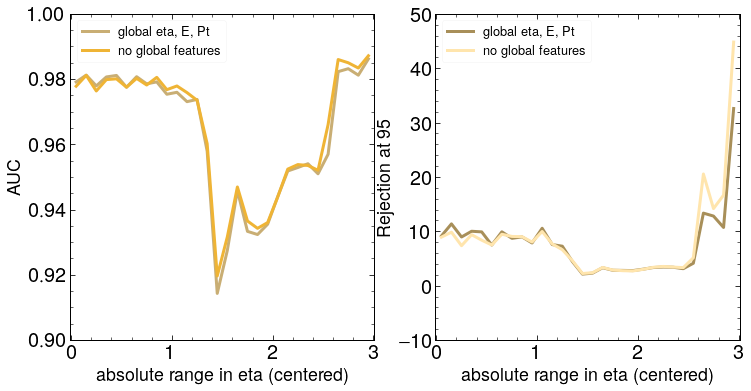

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])

ax1.set_xlim(-.01, 3.01)
ax1.plot(eta_ranges[:-1], aucs_3g[:-1], linewidth=3, c='xkcd:sandstone', label='global eta, E, Pt')
ax1.plot(eta_ranges[:-1], aucs_ng[:-1], linewidth=3, c='xkcd:macaroni and cheese', label='no global features')
ax1.set_xlabel('absolute range in eta (centered)')
ax1.set_ylabel('AUC')
ax1.legend()

ax2.set_xlim(-.01, 3.01)
ax2.plot(eta_ranges[:-1], reg95_3g[:-1], linewidth=3, c='xkcd:dark sand', label='global eta, E, Pt')
ax2.plot(eta_ranges[:-1], reg95_ng[:-1], linewidth=3, c='xkcd:pale peach', label='no global features')
ax2.set_xlabel('absolute range in eta (centered)')
ax2.set_ylabel('Rejection at 95% efficiency')
ax2.legend()

In [68]:
labs1 = ['$\eta$ < .1', '.1 <= $\eta$ < .2', '.2 <= $\eta$ < .3','.3 <= $\eta$ < .4','.4 <= $\eta$ < .5']
labs2 = ['.5 <= $\eta$ < .6','.6 <= $\eta$ < .7','.7 <= $\eta$ < .8','.8 <= $\eta$ < .9','.9 <= $\eta$ < 1.']
labs3 = ['1. <= $\eta$ < 1.1','1.1 <= $\eta$ < 1.2','1.2 <= $\eta$ < 1.3','1.3 <= $\eta$ < 1.4','1.4 <= $\eta$ < 1.5']
labs4 = ['1.5 <= $\eta$ < 1.6','1.6 <= $\eta$ < 1.7','1.7 <= $\eta$ < 1.8','1.8 <= $\eta$ < 1.9','1.9 <= $\eta$ < 2']
labs5 = ['2. <= $\eta$ < 2.1','2.1 <= $\eta$ < 2.2','2.2 <= $\eta$ < 2.3','2.3 <= $\eta$ < 2.4','2.4 <= $\eta$ < 2.5']
labs6 = ['2.5 <= $\eta$ < 2.6','2.6 <= $\eta$ < 2.7','2.7 <= $\eta$ < 2.8','2.8 <= $\eta$ < 2.9','2.9 <= $\eta$ < 3.']
        

def plots(ax, labs, fps, tps, aucs, title, col):
    ax.set_title('range = '+title)
    ax.set_xlim(0.,.2)
    ax.set_ylim(.8,1.)
    ax.plot([0, 1], [0, 1], 'k--')
    for i in range(len(labs)):
        ax.plot(fps[i], tps[i], c=col[i], linewidth=3, label=labs[i] + ' AUC = %.3f '%aucs[i])
    ax.plot(fps_3g[-1], tps_3g[-1], c='b', label='all eta'+' AUC = %.3f '%aucs_3g[-1] )
    ax.set_ylabel('True positive rate')
    ax.set_xlabel('False positive rate')
    ax.legend() 

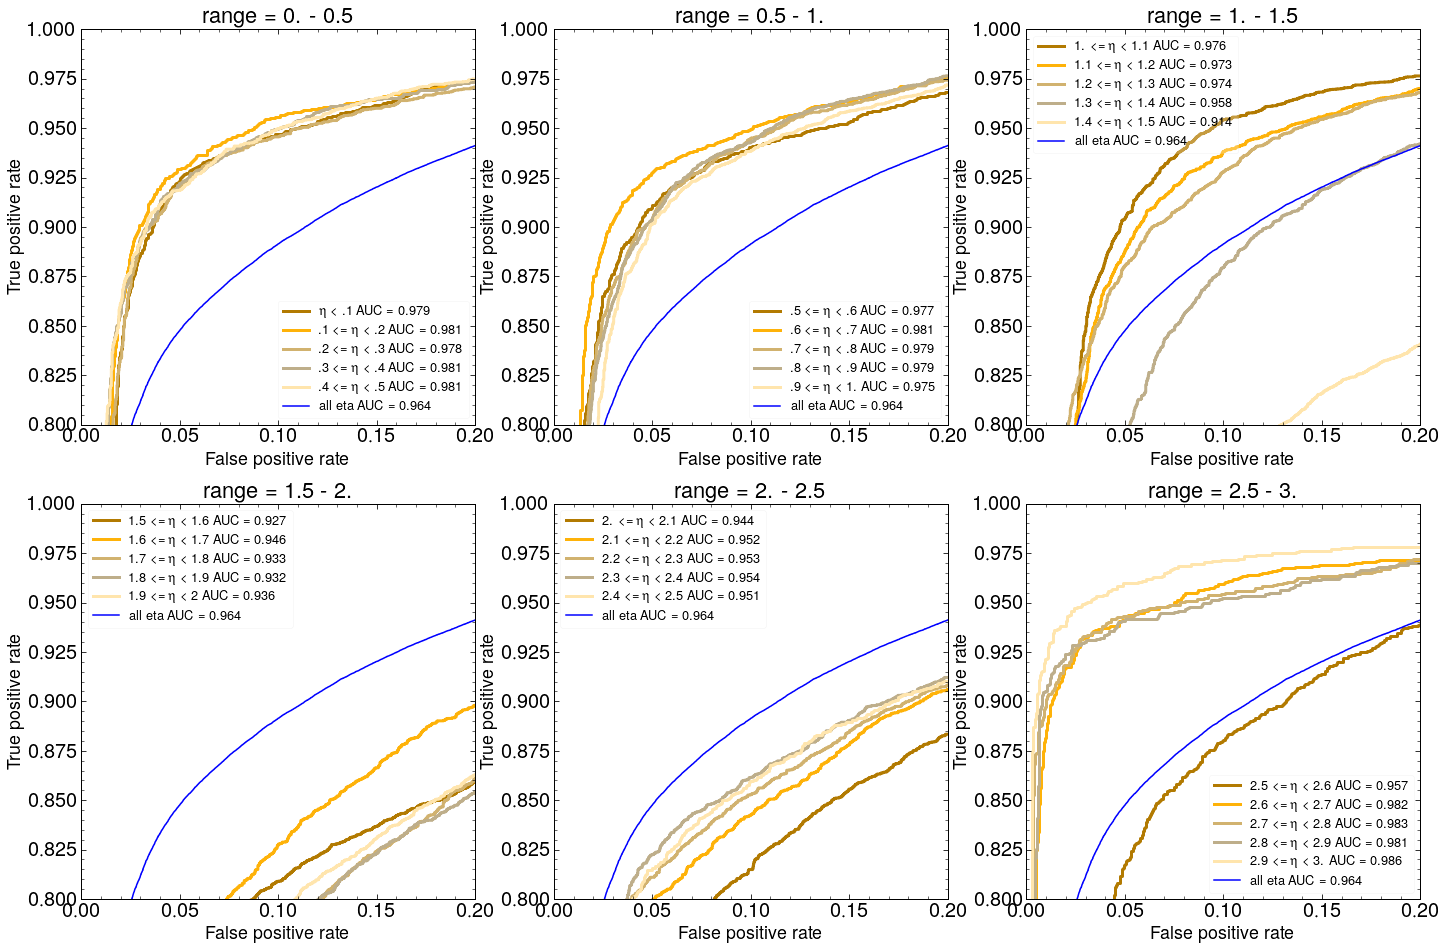

In [69]:
col = ['xkcd:golden brown', 'xkcd:saffron', 'xkcd:tan', 'xkcd:putty', 'xkcd:pale peach']
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=[24,16])

plots(ax1, labs1, fps_3g[:5], tps_3g[:5], aucs_3g[:5], '0. - 0.5', col)
plots(ax2, labs2, fps_3g[5:10], tps_3g[5:10], aucs_3g[5:10], '0.5 - 1.', col)
plots(ax3, labs3, fps_3g[10:15], tps_3g[10:15], aucs_3g[10:15], '1. - 1.5', col)
plots(ax4, labs4, fps_3g[15:20], tps_3g[15:20], aucs_3g[15:20], '1.5 - 2.', col)
plots(ax5, labs5, fps_3g[20:25], tps_3g[20:25], aucs_3g[20:25], '2. - 2.5', col)
plots(ax6, labs6, fps_3g[25:30], tps_3g[25:30], aucs_3g[25:30], '2.5 - 3.', col)
plt.savefig('./eta_ranges_3g_AUCs')

In [75]:
max(ET_test), min(ET_test)

(1955.9921, 0.07305561)

In [83]:
ET_range = np.logspace(np.log10(min(ET_test)), np.log10(max(ET_test)+1), 20)

In [103]:
#this is a way neater way to make the list of selections!!!!!!!!!
selecs = [abs(ET_test) < ET_range[1]]
for i in range(1, len(ET_range)):
    selec_ = (abs(ET_test) >= ET_range[i-1]) & (abs(ET_test) < ET_range[i])
    selecs.append(selec_)

selecs.append(abs(ET_test) < ET_range[-1]+1)

In [104]:
len(selecs)

21

In [96]:
X_glob_test.shape

(300000, 2)

In [106]:
def metrics(model, select):
    #make metrics
    X_1, X_2 = X_test, X_glob_test
    fps = []
    tps = []
    threshss = []
    aucs = []
    for selection in select:
        X_interm = [X_1[selection], X_2[selection]] #YAY got it working!! just had to split it up to make the selection
        preds = model.predict(X_interm, batch_size=1000) 
        pfn_fp, pfn_tp, threshs = roc_curve(Y_test[selection][:,1], preds[:,1])
        
        fps.append(pfn_fp)
        tps.append(pfn_tp)
        threshss.append(threshs)
        
        # get area under the ROC curve
        auc = roc_auc_score(Y_test[selection][:,1], preds[:,1])
        aucs.append(auc)
        print('PFN AUC:', auc)
        
    return fps, tps, aucs

In [107]:
fps_transE, tps_transE, aucs_transE = metrics(model3g, selecs)

PFN AUC: 0.9111231296196142
PFN AUC: 0.9111231296196142
PFN AUC: 0.8196580931080186
PFN AUC: 0.8278116763540376
PFN AUC: 0.8334566123160554
PFN AUC: 0.8656150251533131
PFN AUC: 0.907496624377982
PFN AUC: 0.9349518323111385
PFN AUC: 0.9540089377335902
PFN AUC: 0.9688239471946355
PFN AUC: 0.980423656561781
PFN AUC: 0.9872832492168246
PFN AUC: 0.9918058341201736
PFN AUC: 0.9941677721031096
PFN AUC: 0.9946094324873062
PFN AUC: 0.9957129990970615
PFN AUC: 0.996739484155681
PFN AUC: 0.9963863876966345
PFN AUC: 0.9957005912721175
PFN AUC: 0.996974682655881
PFN AUC: 0.9639969297151463


In [100]:
#make metrics
fps_ngte = []
tps_ngte = []
aucs_ngte = []
for selection in selecs:
    preds = model_nog.predict(X_test[selection], batch_size=1000) 
    pfn_fp, pfn_tp, threshs = roc_curve(Y_test[selection][:,1], preds[:,1])

    fps_ngte.append(pfn_fp)
    tps_ngte.append(pfn_tp)
    
    # get area under the ROC curve
    auc = roc_auc_score(Y_test[selection][:,1], preds[:,1])
    aucs_ngte.append(auc)
    print('PFN AUC:', auc)


PFN AUC: 0.8575806742383271
PFN AUC: 0.8575806742383271
PFN AUC: 0.8405587309476475
PFN AUC: 0.8294009429381743
PFN AUC: 0.8286485126598195
PFN AUC: 0.8649753184806601
PFN AUC: 0.908196694530976
PFN AUC: 0.9375824029612595
PFN AUC: 0.9570659273935562
PFN AUC: 0.971383736095691
PFN AUC: 0.9813181995870339
PFN AUC: 0.9884743817475439
PFN AUC: 0.9933059771196169
PFN AUC: 0.9945191984479086
PFN AUC: 0.9952818283188136
PFN AUC: 0.9963046528299437
PFN AUC: 0.996734381700909
PFN AUC: 0.9955999935990815
PFN AUC: 0.9969062090926473
PFN AUC: 0.997809562516424
PFN AUC: 0.9647645009952375


In [121]:
f3g_te = []
for i in range(len(fps_transE[:-1])):
    f3g_te.append(interp1d(tps_transE[:-1][i], 1/fps_transE[:-1][i]))

fngte = []
for i in range(len(fps_ngte[:-1])):
    fngte.append(interp1d(tps_ngte[:-1][i], 1/fps_ngte[:-1][i]))

reg95_te = []
for i in range(len(f3g_te)):
    reg95_te.append(f3g_te[i](.95))
    
reg95_ngte = []
for i in range(len(fngte)):
    reg95_ngte.append(fngte[i](.95))

<ipython-input-121-0b54dcd60e45>:3: RuntimeWarning: divide by zero encountered in true_divide
  f3g_te.append(interp1d(tps_transE[:-1][i], 1/fps_transE[:-1][i]))
<ipython-input-121-0b54dcd60e45>:7: RuntimeWarning: divide by zero encountered in true_divide
  fngte.append(interp1d(tps_ngte[:-1][i], 1/fps_ngte[:-1][i]))


In [122]:
np.mean(reg95_ngte)

133.38076668580334

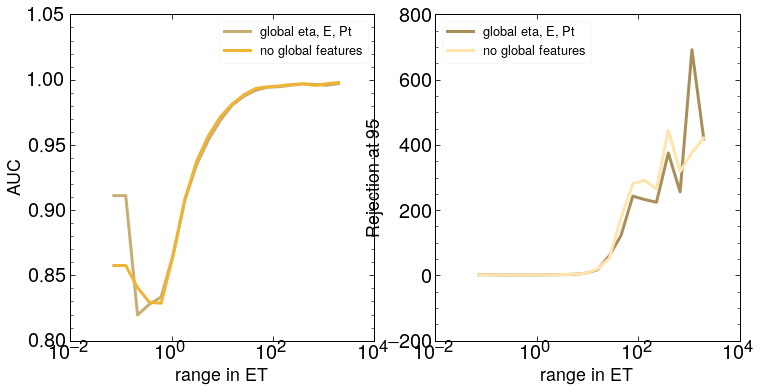

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])

#ax1.set_xlim(-10, 2000)
ax1.semilogx()
ax1.plot(ET_range, aucs_transE[:-1], linewidth=3, c='xkcd:sandstone', label='global eta, E, Pt')
ax1.plot(ET_range, aucs_ngte[:-1], linewidth=3, c='xkcd:macaroni and cheese', label='no global features')
ax1.set_xlabel('range in ET')
ax1.set_ylabel('AUC')
ax1.legend()

#ax2.set_xlim(-10, 2000)
ax2.semilogx()
ax2.plot(ET_range, reg95_te, linewidth=3, c='xkcd:dark sand', label='global eta, E, Pt')
ax2.plot(ET_range, reg95_ngte, linewidth=3, c='xkcd:pale peach', label='no global features')
ax2.set_xlabel('range in ET')
ax2.set_ylabel('Rejection at 95% efficiency')
ax2.legend()

In [ ]:
labs1 = [' < .1', '.1 <= $\eta$ < .2', '.2 <= $\eta$ < .3','.3 <= $\eta$ < .4','.4 <= $\eta$ < .5']
labs2 = ['.5 <= $\eta$ < .6','.6 <= $\eta$ < .7','.7 <= $\eta$ < .8','.8 <= $\eta$ < .9','.9 <= $\eta$ < 1.']
labs3 = ['1. <= $\eta$ < 1.1','1.1 <= $\eta$ < 1.2','1.2 <= $\eta$ < 1.3','1.3 <= $\eta$ < 1.4','1.4 <= $\eta$ < 1.5']
labs4 = ['1.5 <= $\eta$ < 1.6','1.6 <= $\eta$ < 1.7','1.7 <= $\eta$ < 1.8','1.8 <= $\eta$ < 1.9','1.9 <= $\eta$ < 2']


In [71]:
#trying again with only two of them instead of all 3, see if this helps
X_glob_train = np.stack((np.array(X_glob_tr[0]), np.array(X_glob_tr[1])), axis=1)
X_glob_vali = np.stack((np.array(X_glob_val[0]), np.array(X_glob_val[1])), axis=1)
X_glob_test = np.stack((np.array(X_glob_te[0]), np.array(X_glob_te[1])), axis=1)

In [74]:
history2 = GlobalModel(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_train, X_glob_vali, X_glob_test, 100, 1000, 2)

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_63 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_63[0][0]              
____________________________________________________________________________________________

KeyboardInterrupt: 